In [1]:
################################################################################################
# Abraham Tishelman-Charny                                                                     #
# 24 March 2021                                                                                #
#                                                                                              #
# The purpose of this notebook is to compare HH, H and data sideband yields between            #
# WWgg DNN trainings.                                                                          #
################################################################################################

In [2]:
import uproot 
from matplotlib import pyplot as plt 
from matplotlib.ticker import MaxNLocator
import numpy as np 
import math 

Matplotlib is building the font cache; this may take a moment.


In [3]:
years = [
    "2016", 
    "2017", 
    "2018"
]

# colors = [
#     ##-- MultiClassifier 
#     'C0',
#     'mediumblue',
#     'midnightblue',
    
#     ##-- Binary 
#     'green',
#     'limegreen'
# ]

colors = [
    ##-- MultiClassifier 
    'C0',
    'C0',
    'C0',
    
    ##-- Binary 
    'C1',
    'C1'
]

# lineStyles = [
#     '-',
#     '-',
#     '-',
#     '-',
#     '-'
# ]

lineStyles = [
    '-',
    '--',
    ':',
    '-',
    '--'
]

lineAlphas = [
    1,
    1,
    1,
    1,
    1
    
]

trainingLabels = [
                  "HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields", 
                  "HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields",
                  "HHWWyyDNN_MultiClass_EvenSingleH_2Hgg_withKinWeight_HggClassScale_4_BkgClassScale_1_BalanceYields",
                  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM",
                  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel"
#                   "HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields", 
#                   "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM", 
#                   "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel"
                  ]

trainingLabelsShort = [
    "MultiClass_Factor1",
    "MultiClass_Factor2",
    "MultiClass_Factor4",
    "Binary",
    "Binary_KinWeight"
]

SignalCats = [
    "GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV_HHWWggTag_SL_0",
    "GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV_HHWWggTag_SL_1",
    "GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV_HHWWggTag_SL_2",
    "GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV_HHWWggTag_SL_3",
]

DataCats = [
    "Data_13TeV_HHWWggTag_SL_0",
    "Data_13TeV_HHWWggTag_SL_1",
    "Data_13TeV_HHWWggTag_SL_2",
    "Data_13TeV_HHWWggTag_SL_3",
]

cats = [
    "HHWWggTag_SL_0",
    "HHWWggTag_SL_1",
    "HHWWggTag_SL_2",
    "HHWWggTag_SL_3",
]

ProcTreeLabel = ["GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV", "Data_13TeV"]

ProcTreeLabels = {
    "Signal" : "GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV",
    "Data_Sidebands" : "Data_13TeV",
    "ggh" : "ggh_125_13TeV",
    "vbf" : "vbf_125_13TeV",
    "wzh" : "wzh_125_13TeV",
    "tth" : "tth_125_13TeV",
}

CatNums = ["0", "1", "2", "3"]

baseDirec = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/"

LumiDict = {
    "2016" : "35.9",
    "2017" : "41.5",
    "2018" : "59.4"
}

procs = ["Signal", "Data_Sidebands", "ggh", "vbf", "wzh", "tth"]
# procs = ["ggh", "vbf", "wzh", "tth"]

GetSHName = {
    "ggh" : "GluGluHToGG",
    "vbf" : "VBFHToGG",
    "wzh" : "VHToGG",
    "tth" : "ttHJetToGG"
}

# SelectionDict = {
#     "Signal" : "(True)",
#     "Data_Sidebands" : "np.logical_or(CMS_hgg_mass < 115, CMS_hgg_mass > 135)"
# }

In [53]:
##-- Save all values then plot 
for proc in procs:
    print("Proc:",proc)
#     Selection = SelectionDict[proc]
    BaseTree = ProcTreeLabels[proc]
    for year in years:
        print("-->Year:",year)
        Lumi = LumiDict[year]
            
        if(proc == "Signal"): file = "Signal_cHHH1_%s_all_CategorizedTrees.root"%(year)
            
        elif(proc == "Data_Sidebands"): file = "Data_%s_CategorizedTrees.root"%(year)
            
        ##-- Single Higgs
        else: 
            SHName = GetSHName[proc]
            file = "Single_H/SingleHiggs_%s_%s_all_CategorizedTrees.root"%(SHName, year)
            
        for iL, trainingLabel in enumerate(trainingLabels):
            trainingLabelShort = trainingLabelsShort[iL]
            print("---->Training:",trainingLabelShort)
            
            ##-- Scale Factor
            if(proc == "Signal"):
                SF = float(Lumi) * 31.049 * 0.000970198 * 0.441
            elif(proc == "Data_Sidebands"):
                SF = 1.
            else:
                if("MultiClass" in trainingLabelShort):
                    SF = float(Lumi) * 2. ##-- Factor of two for multiclass Single Higgs     
                else:
                    SF = float(Lumi)
            
            signalPath = "%s/%s/%s/%s"%(baseDirec, year, trainingLabel, file)
            f = uproot.open(signalPath)
            for cat in cats:
                print("------>Category:",cat)
                treeName = "%s_%s"%(BaseTree, cat)
                tree = f[treeName]
                MCweight = tree['weight'].array()
                CMS_hgg_mass = tree['CMS_hgg_mass'].array()
                if(proc == "Data_Sidebands"):
                    print("BLINDING DATA") 
                    MASK = np.logical_or(CMS_hgg_mass <= 115, CMS_hgg_mass >= 135)
                    
                else:
                    MASK = tuple([CMS_hgg_mass != -999])
#                     MASK = [CMS_hgg_mass != -999]
                
                MCweight = MCweight[MASK]
                weightSum = sum(MCweight)
                weightSum = float(weightSum) * float(SF)
#                 print("weightSum * SF:",weightSum)
                catNum = cat.split('_')[-1] ## 0, 1, 2 ,3 
                exec("%s_Yield_%s_%s_%s = weightSum"%(proc, trainingLabelShort, year, catNum))
            
print("DONE")
                

Proc: Signal
-->Year: 2016
---->Training: MultiClass_Factor1
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: MultiClass_Factor2
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: MultiClass_Factor4
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: Binary
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: Binary_KinWeight
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
-->Year: 2017
---->Training: MultiClass_Factor1
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
-

------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: MultiClass_Factor2
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: MultiClass_Factor4
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: Binary
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: Binary_KinWeight
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
-->Year: 2017
---->Training: MultiClass_Factor1
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_SL_1
------>Category: HHWWggTag_SL_2
------>Category: HHWWggTag_SL_3
---->Training: MultiClass_Factor2
------>Category: HHWWggTag_SL_0
------>Category: HHWWggTag_S

proc: Signal
year: 2016
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2017
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2018
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


<ipython-input-55-4cc1cb57b653>:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axis.plot(yields_x, yields_y, '-o', label = trainingLabelShort, color = color, lineStyle = lineStyle, alpha = lineAlpha)


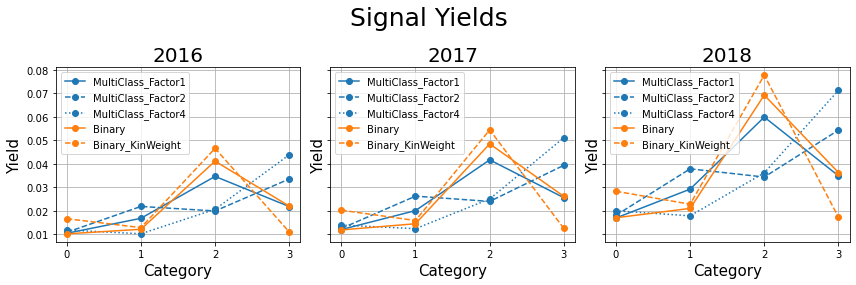

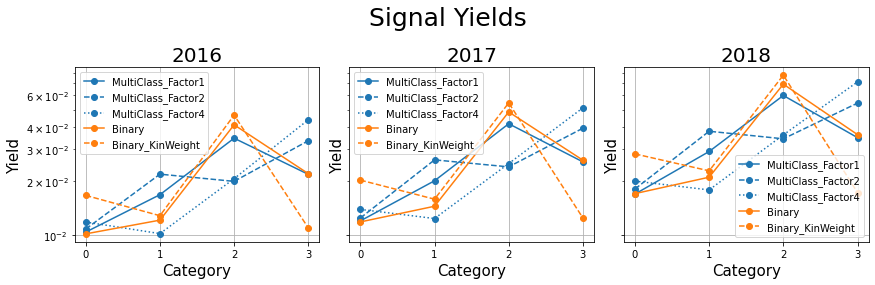

<ipython-input-55-4cc1cb57b653>:56: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(yields_x, yields_y, '-o', label = trainingLabelShort, color = color, lineStyle = lineStyle, alpha = lineAlpha)


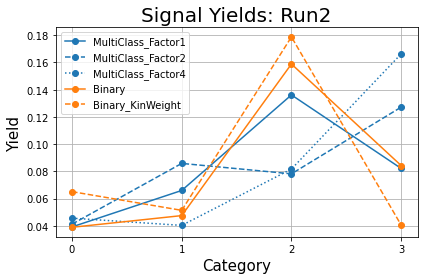

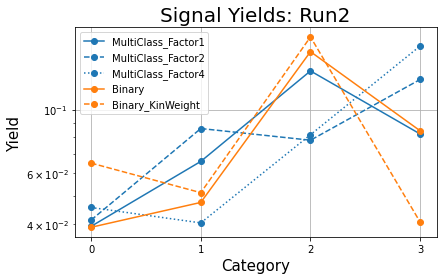

proc: Data_Sidebands
year: 2016
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2017
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2018
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


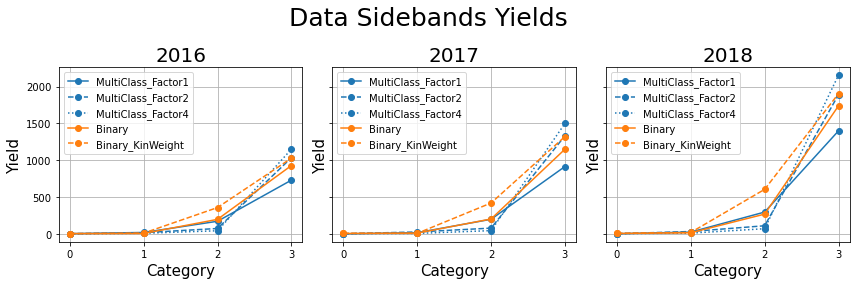

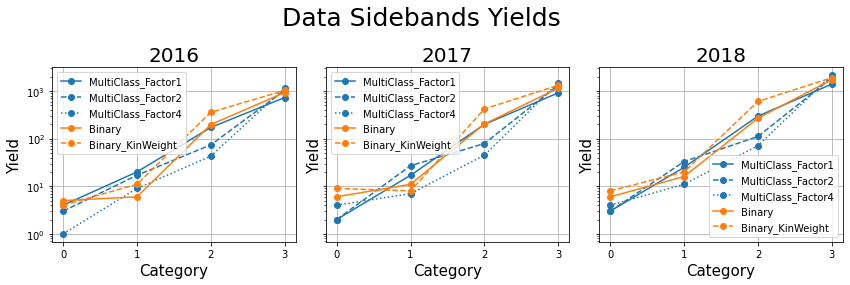

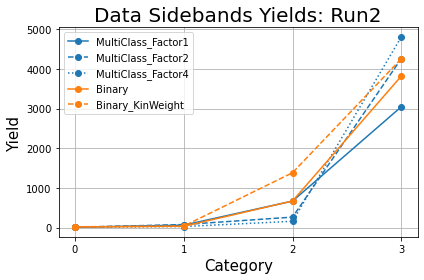

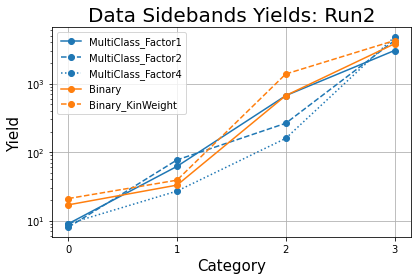

proc: ggh
year: 2016
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2017
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2018
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


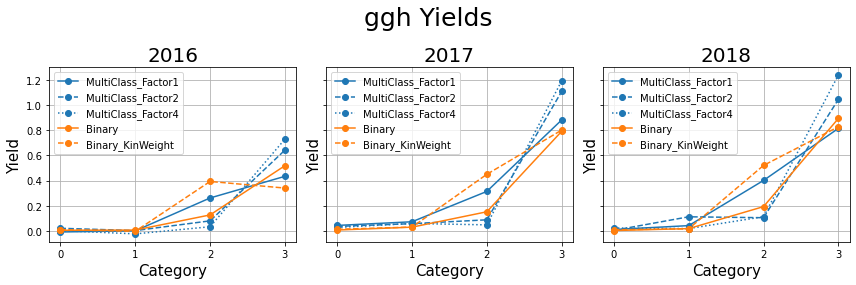

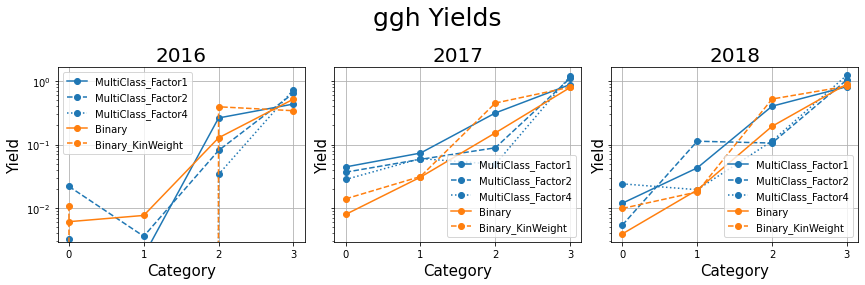

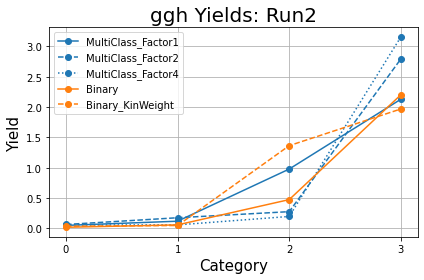

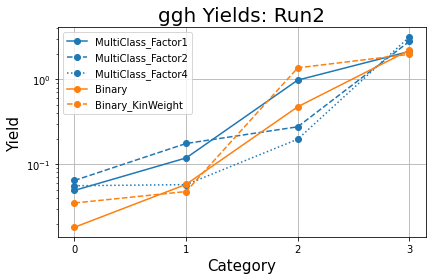

proc: vbf
year: 2016
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2017
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2018
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


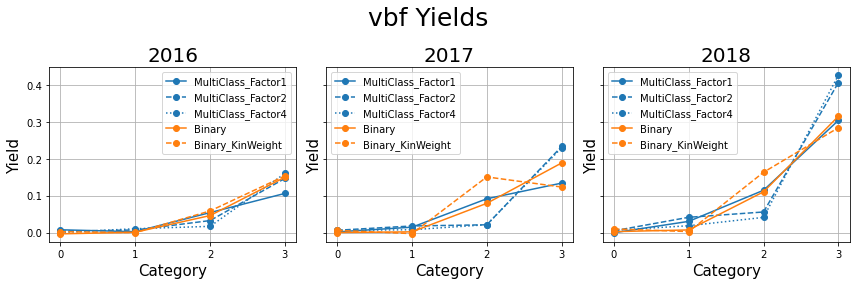

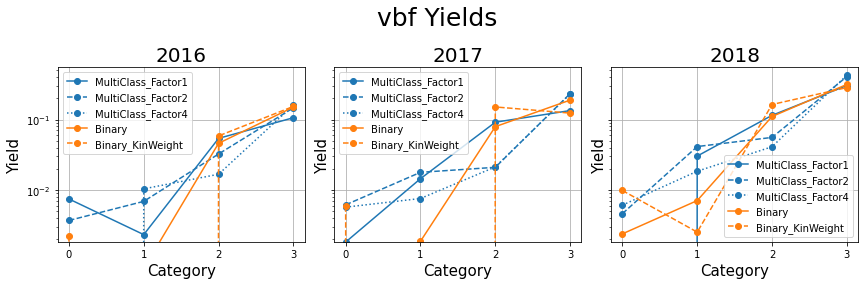

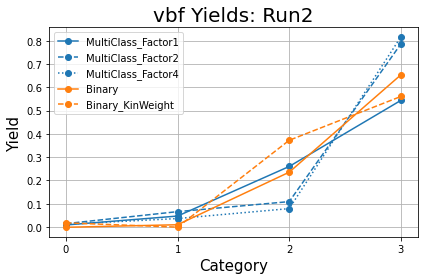

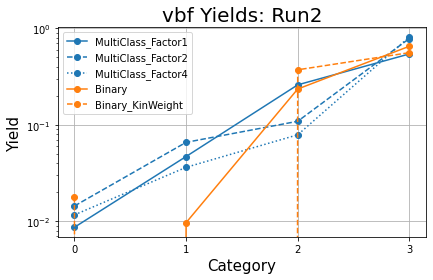

proc: wzh
year: 2016
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2017
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2018
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


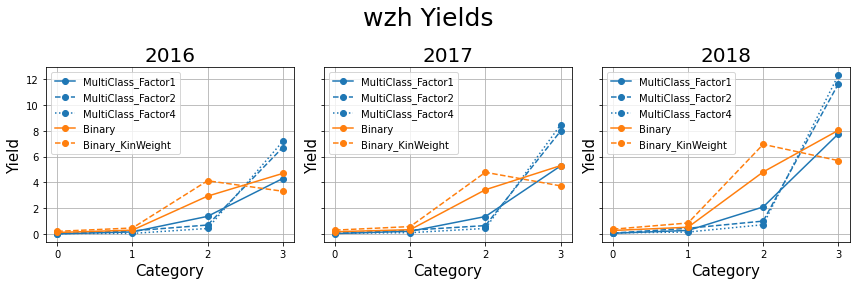

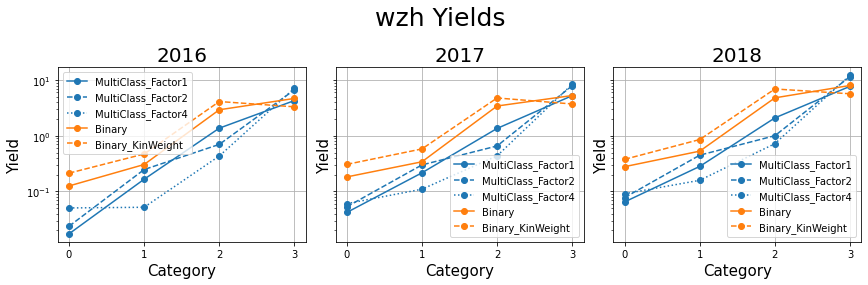

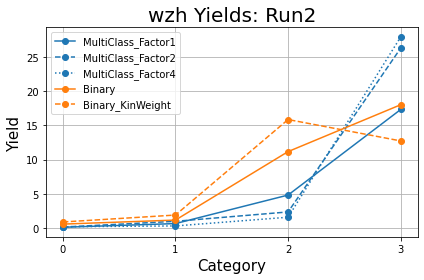

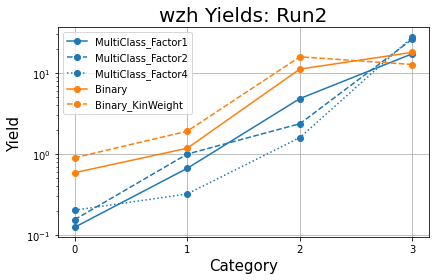

proc: tth
year: 2016
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2017
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight
year: 2018
trainingLabelShort: MultiClass_Factor1
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


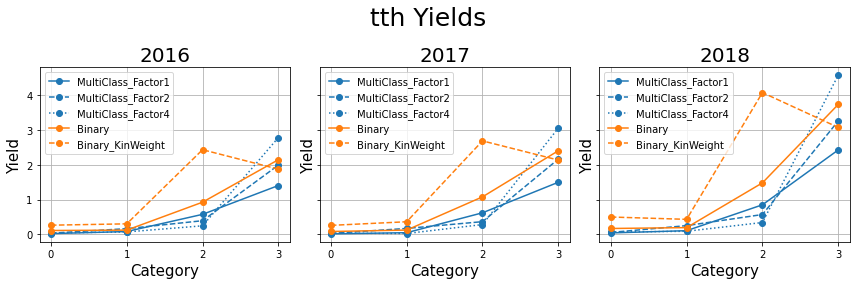

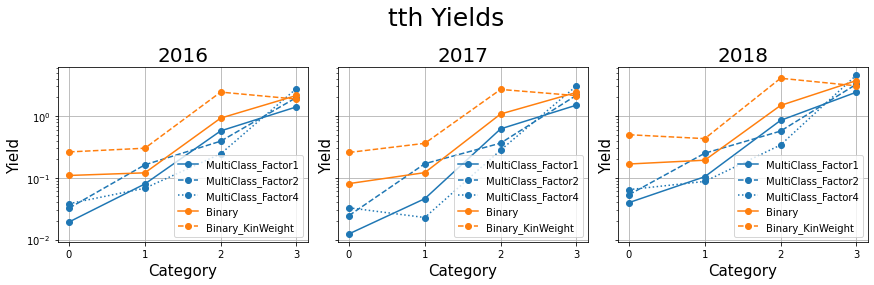

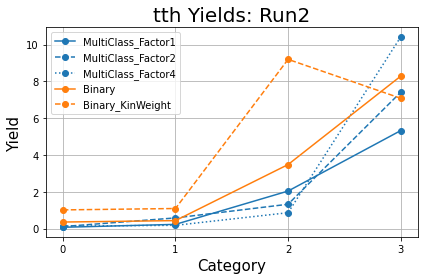

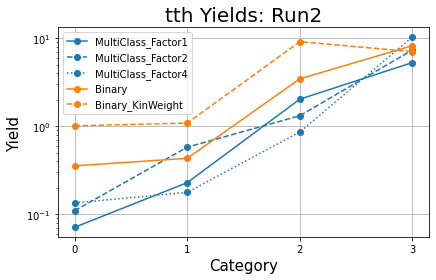

In [55]:
for iproc, proc in enumerate(procs):
    print("proc:", proc)
#     if(iproc > 0): break
    
    fig, ax = plt.subplots(1, 3, sharey=True)
#     fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(12, 4)
    ##-- Per year yields all on one canvas
    for iyear, year in enumerate(years):
        print("year:",year)
        axis = ax[iyear]

        for itr, trainingLabelShort in enumerate(trainingLabelsShort):
            print("trainingLabelShort:",trainingLabelShort)
            color, lineStyle, lineAlpha = colors[itr], lineStyles[itr], lineAlphas[itr]
            yields_x = []
            yields_y = []
            for cat_i in CatNums:
                c = int(cat_i)
                exec("y = %s_Yield_%s_%s_%s"%(proc, trainingLabelShort, year, c))
                yields_x.append(c)
                yields_y.append(y)
            axis.plot(yields_x, yields_y, '-o', label = trainingLabelShort, color = color, lineStyle = lineStyle, alpha = lineAlpha)

        axis.xaxis.set_major_locator(MaxNLocator(integer=True))
        axis.set_title(year, fontsize = 20)
        axis.set_xlabel("Category", fontsize = 15)
        axis.set_ylabel("Yield", fontsize = 15)
        axis.legend(loc="best")
        axis.grid(True)        

    ##-- Label Plot
    procLabel = proc.replace("_", " ")
    fig.suptitle("%s Yields"%(procLabel), fontsize=25)
    plt.tight_layout()
    plt.show(False) ##-- Linear scale 
#     if(proc == "Data_Sidebands"):
    plt.yscale('log') ##-- Log scale 
    plt.show()
    plt.close()
    
    
    fig, ax = plt.subplots()
    for itr, trainingLabelShort in enumerate(trainingLabelsShort):
        color, lineStyle, lineAlpha = colors[itr], lineStyles[itr], lineAlphas[itr]
        yields_x = []
        yields_y = []
        for cat_i in CatNums:
            c = int(cat_i)
            run2_total = 0
            for year in years:
                exec("y = %s_Yield_%s_%s_%s"%(proc, trainingLabelShort, year, c))
                run2_total += y 
            yields_x.append(c)
            yields_y.append(run2_total)
        plt.plot(yields_x, yields_y, '-o', label = trainingLabelShort, color = color, lineStyle = lineStyle, alpha = lineAlpha)
            
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    ##-- Label Plot
    procLabel = proc.replace("_", " ")
    plt.title("%s Yields: Run2"%(procLabel), fontsize=20)
    plt.xlabel("Category", fontsize = 15)
    plt.ylabel("Yield", fontsize = 15)
#     if(proc == "Data_Sidebands"):
#         plt.yscale('log')
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show(False)
    plt.yscale('log')
    plt.show()
    plt.close()      
    

proc: Signal
year: 2016
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


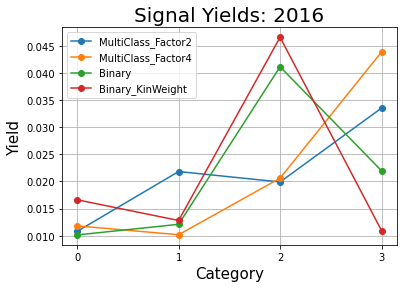

year: 2017
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


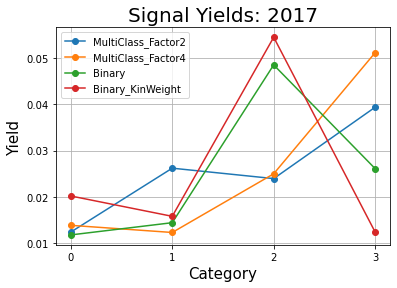

year: 2018
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


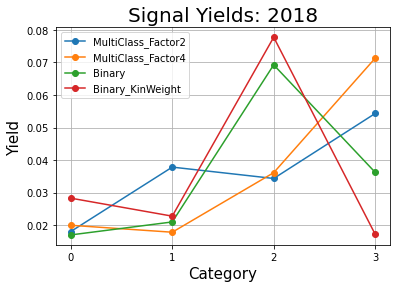

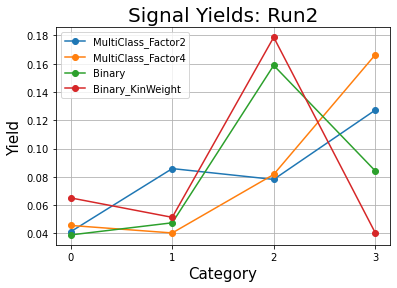

proc: Data_Sidebands
year: 2016
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


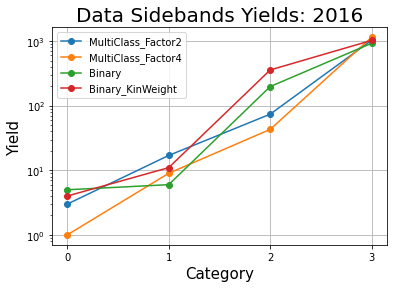

year: 2017
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


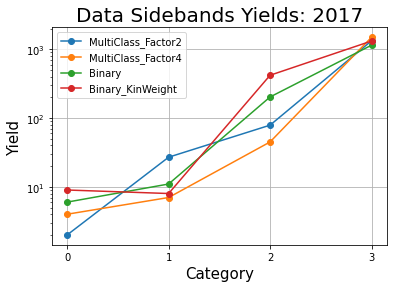

year: 2018
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


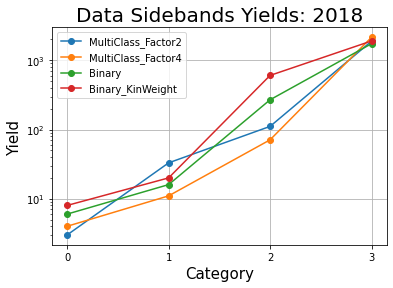

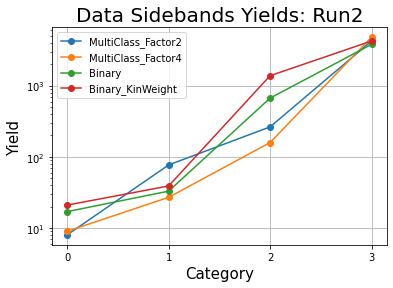

proc: ggh
year: 2016
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


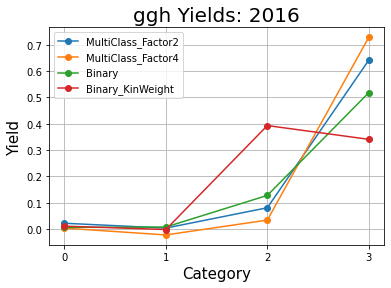

year: 2017
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


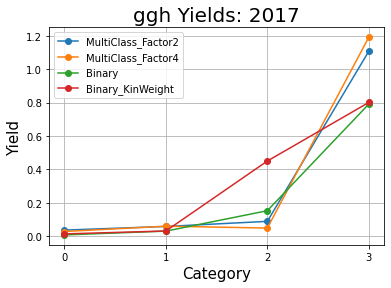

year: 2018
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


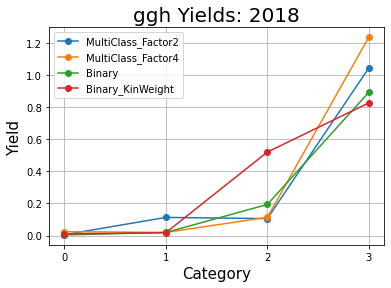

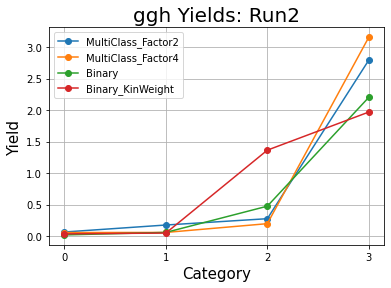

proc: vbf
year: 2016
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


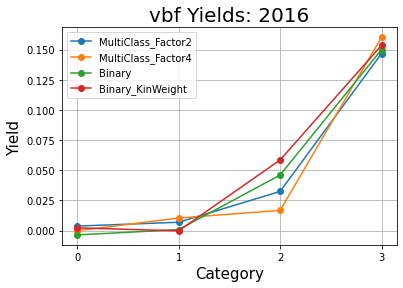

year: 2017
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


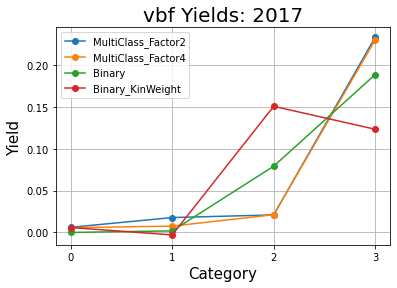

year: 2018
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


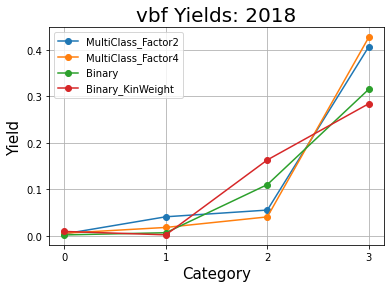

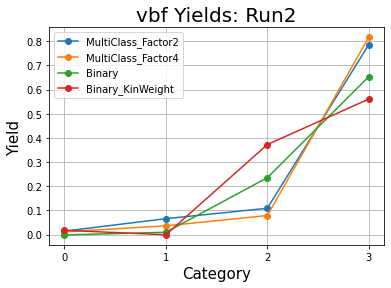

proc: wzh
year: 2016
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


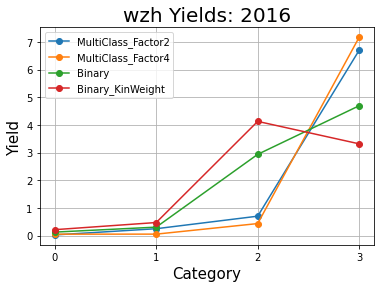

year: 2017
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


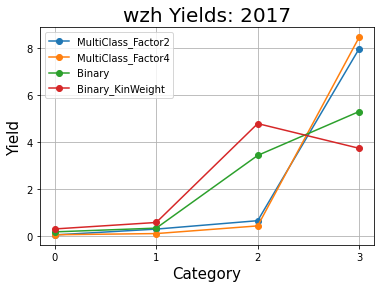

year: 2018
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


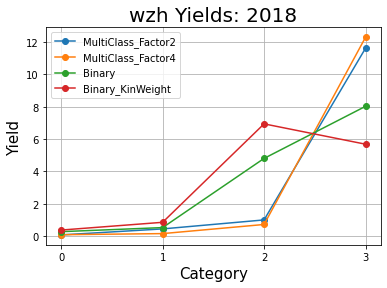

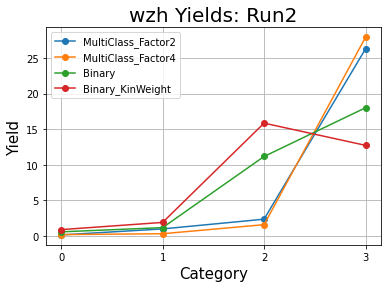

proc: tth
year: 2016
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


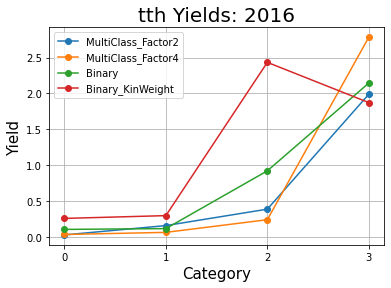

year: 2017
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


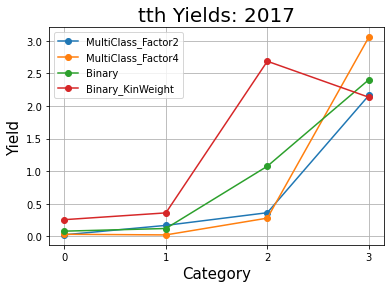

year: 2018
trainingLabelShort: MultiClass_Factor2
trainingLabelShort: MultiClass_Factor4
trainingLabelShort: Binary
trainingLabelShort: Binary_KinWeight


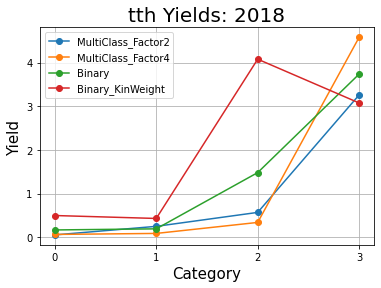

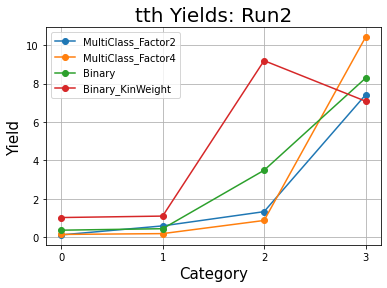

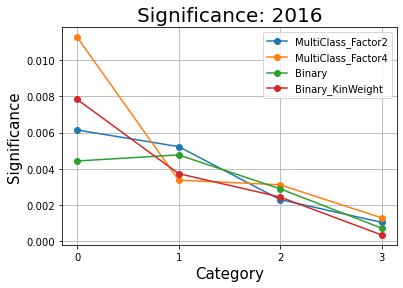

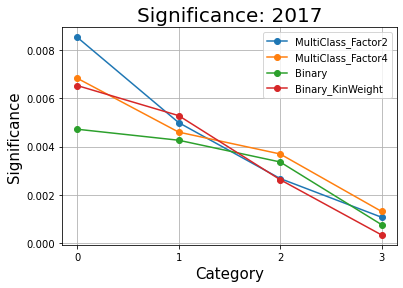

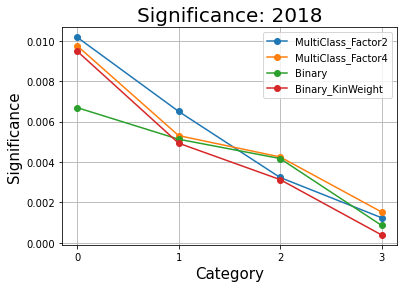

In [7]:
# for proc in procs:
#     print("proc:", proc)
        
#     ##-- Run 2 
#     fig, ax = plt.subplots()
#     for trainingLabelShort in trainingLabelsShort:
#         yields_x = []
#         yields_y = []
#         for cat_i in CatNums:
#             c = int(cat_i)
#             run2_total = 0
#             for year in years:
#                 exec("y = %s_Yield_%s_%s_%s"%(proc, trainingLabelShort, year, c))
#                 run2_total += y 
#             yields_x.append(c)
#             yields_y.append(run2_total)
#         plt.plot(yields_x, yields_y, '-o', label = trainingLabelShort)
            
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#     ##-- Label Plot
#     procLabel = proc.replace("_", " ")
#     plt.title("%s Yields: Run2"%(procLabel), fontsize=20)
#     plt.xlabel("Category", fontsize = 15)
#     plt.ylabel("Yield", fontsize = 15)
#     if(proc == "Data_Sidebands"):
#         plt.yscale('log')
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.show()
#     plt.close()            
      
# ##-- Per Year Significance (S / sqrt(B)). B = Data Sidebands + ggH + vbf + VH + ttH 
# for year in years:
#     fig, ax = plt.subplots() 
#     for trainingLabelShort in trainingLabelsShort:
#         yields_x = []
#         yields_y = []
#         for cat_i in CatNums:
#             c = int(cat_i)
#             S = 0 
#             B = 0 
#             exec("S = Signal_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("D_yield = Data_Sidebands_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("ggh_yield = ggh_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("vbf_yield = vbf_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("wzh_yield = wzh_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("tth_yield = tth_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             B = float(D_yield) + float(ggh_yield) + float(vbf_yield) + float(wzh_yield) + float(tth_yield)
#             Significance = math.sqrt((2*(S+B)*math.log(1+(S/B))) - 2*S)
#             yields_x.append(c)
#             yields_y.append(Significance)   
#         plt.plot(yields_x, yields_y, '-o', label = trainingLabelShort)
            
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#     ##-- Label Plot
#     procLabel = proc.replace("_", " ")
#     plt.title("Significance: %s"%(year), fontsize=20)
#     plt.xlabel("Category", fontsize = 15)
#     plt.ylabel("Significance", fontsize = 15)
# #     if(proc == "Data_Sidebands"):
# #         plt.yscale('log')
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.show()
#     plt.close()  
    
    
# ##-- Run 2 Significance 
# fig, ax = plt.subplots() 
# for trainingLabelShort in trainingLabelsShort:
#     yields_x = []
#     yields_y = []
#     for cat_i in CatNums:
#         c = int(cat_i)
#         Significance = 0 
#         for year in years:
#             S = 0 
#             B = 0 
#             exec("S = Signal_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("D_yield = Data_Sidebands_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("ggh_yield = ggh_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("vbf_yield = vbf_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("wzh_yield = wzh_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             exec("tth_yield = tth_Yield_%s_%s_%s"%(trainingLabelShort, year, c))
#             B = float(D_yield) + float(ggh_yield) + float(vbf_yield) + float(wzh_yield) + float(tth_yield)
#             Significance += math.sqrt((2*(S+B)*math.log(1+(S/B))) - 2*S)
#         yields_x.append(c)
#         yields_y.append(Significance)   
#     plt.plot(yields_x, yields_y, '-o', label = trainingLabelShort)

# ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# ##-- Label Plot
# procLabel = proc.replace("_", " ")
# plt.title("Significance: Run 2", fontsize=20)
# plt.xlabel("Category", fontsize = 15)
# plt.ylabel("Significance", fontsize = 15)
# #     if(proc == "Data_Sidebands"):
# #         plt.yscale('log')
# plt.legend(loc="best")
# plt.grid(True)
# plt.show()
# plt.close()      
        

In [14]:
##-- Limits 

years = ["2016", "2017", "2018"]
# years = ["2016", "2018"]
HggTypes = ["noHgg", "withHgg"]
HggDict = {
    "noHgg" : "_no_singleH",
    "withHgg" : ""
}

TrainingLabels = [
                  "HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields", 
                  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM", 
                  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel"
                  ]

TrainingLabelsShort = {
    "HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields" : "MultiClass",
    "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM" : "Binary", 
    "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel" : "Binary_KinWeight"
}

# TrainingLabelsShort = [
#     "MultiClass",
#     "Binary",
#     "Binary_KinWeight"
# ]

##-- Save limits as lists 
for year in years:
    for HggType in HggTypes:
        for TrainingLabel in TrainingLabels:
            Direc = "Limits/%s_%s"%(year, HggType)
            HggString = HggDict[HggType]
            file = "%s/HHWWgg_GluGluToHHTo2G2Qlnu_node_cHHH1_SL_%s_%s%s.root"%(Direc, TrainingLabel, year, HggString)
            f = uproot.open(file)
            limits = f["limit/limit"].array()
            TrainingLabelNoDash = TrainingLabel.replace("-", "_")
            exec("Limits_%s_%s_%s = limits"%(year, HggType, TrainingLabelNoDash))
#             print("limits:",limits)
    

##-- Plot median limits together
for year in years:
    fig, ax = plt.subplots()
    fig.set_size_inches(7,5,7.5)
    for TrainingLabel in TrainingLabels:
        TrainingLabelNoDash = TrainingLabel.replace("-", "_")
        ##-- for each training, plot a line of limit without, with single higgs 
        x_vals = [0, 1]
        y_vals = []
        for HggType in HggTypes:
            exec("Limits = Limits_%s_%s_%s"%(year, HggType, TrainingLabelNoDash))
            median = Limits[2]
            y_vals.append(median)
        ShortTrainingLabel = TrainingLabelsShort[TrainingLabel]
        
        plt.plot(x_vals, y_vals, '-o', label = ShortTrainingLabel)
    
    plt.xlim(-0.5, 1.5)
    plt.xticks([0, 1], ["Without Hgg", "With Hgg"], fontsize = 15)
    
    plt.title("Median Limits: %s"%(year), fontsize = 15)
    plt.ylabel(r"Median 95\% CL limit on $\frac{\sigma_{expected}}{\sigma_{SM NLO}}$", fontsize = 15)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    plt.close()

print("DONE")

FileNotFoundError: [Errno 2] No such file or directory: 'Limits/2016_noHgg/HHWWgg_GluGluToHHTo2G2Qlnu_node_cHHH1_SL_HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields_2016_no_singleH.root'

<ipython-input-15-041235c641c4>:125: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x_vals, y_vals, '-o', label = ShortTrainingLabel, color = color, lineStyle = lineStyle, alpha = lineAlpha)


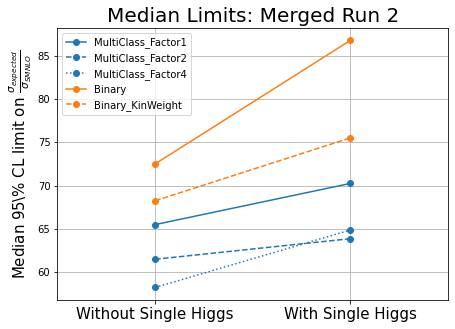

DONE


In [15]:

colors = [
    ##-- MultiClassifier 
    'C0',
    'C0',
    'C0',
    
    ##-- Binary 
    'C1',
    'C1'
]

# lineStyles = [
#     '-',
#     '-',
#     '-',
#     '-',
#     '-'
# ]

lineStyles = [
    '-',
    '--',
    ':',
    '-',
    '--'
]

lineAlphas = [
    1,
    1,
    1,
    1,
    1
]  


##-- Run 2 Limits 

# years = ["2016", "2017", "2018"]
# years = ["2016", "2018"]
# DataTypes = ["Merged", "SepYear"]
# DataTypes = [""]
DataTypes = []

# HggTypes = ["WithSingleHiggs", "WithoutSingleHiggs"]
HggTypes = ["WithoutSingleHiggs", "WithSingleHiggs"]
HggTypeStr = {
    "WithSingleHiggs" : "With Single Higgs",
    "WithoutSingleHiggs" : "Without Single Higgs"
}

fileStr = {
    "WithSingleHiggs" : "_",
    "WithoutSingleHiggs" : "_noSingleHiggs_"    
}

##- Limits/MergedData_WithoutSingleHiggs/SL_run2_merged_WithoutSingleHiggs_HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields.root
##- Limits/MergedData_WithSingleHiggs/SL_run2_mergedHHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields.root

# Limits
# |-- MergedData_WithSingleHiggs
# |   |-- SL_run2_merged_HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields.root
# |   |-- SL_run2_merged_HHWWyyDNN_MultiClass_EvenSingleH_2Hgg_withKinWeight_HggClassScale_4_BkgClassScale_1_BalanceYields.root
# |   |-- SL_run2_merged_HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields.root
# |   |-- SL_run2_merged_HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM.root
# |   `-- SL_run2_merged_HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel.root
# `-- MergedData_WithoutSingleHiggs
#     |-- SL_run2_merged_noSingleHiggs_HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields.root
#     |-- SL_run2_merged_noSingleHiggs_HHWWyyDNN_MultiClass_EvenSingleH_2Hgg_withKinWeight_HggClassScale_4_BkgClassScale_1_BalanceYields.root
#     |-- SL_run2_merged_noSingleHiggs_HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields.root
#     |-- SL_run2_merged_noSingleHiggs_HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM.root
#     `-- SL_run2_merged_noSingleHiggs_HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel.root

TrainingLabels = [
                  "HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields", 
                  "HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields",
                  "HHWWyyDNN_MultiClass_EvenSingleH_2Hgg_withKinWeight_HggClassScale_4_BkgClassScale_1_BalanceYields",
                  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM",
                  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel"
                  ]

TrainingLabelsShort = {
  "HHWWyyDNN_200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields" : "MultiClass_Factor1", 
  "HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields" : "MultiClass_Factor2",
  "HHWWyyDNN_MultiClass_EvenSingleH_2Hgg_withKinWeight_HggClassScale_4_BkgClassScale_1_BalanceYields" : "MultiClass_Factor4",
  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM" : "Binary",
  "HHWWyyDNN_binary_noHgg_noNegWeights_BalanceYields_allBkgs_LOSignals_noPtOverM_withKinWeight_weightSel" : "Binary_KinWeight"    
}

DataTypeStr = {
    "Merged" : "merged",
    "SepYear" : "separate_year"
}

##-- Save limits as lists 
for HggType in HggTypes:
    HggLabel = HggTypeStr[HggType]
    fileStr_ = fileStr[HggType]
# for DataType in DataTypes:
#     DataLabel = DataTypeStr[DataType]
    for TrainingLabel in TrainingLabels:
        Direc = "Limits/MergedData_%s"%(HggType)
#         file = "%s/SL_run2_%s_%s.root"%(Direc, DataLabel, TrainingLabel)
        file = "%s/SL_run2_merged%s%s.root"%(Direc, fileStr_, TrainingLabel)
        f = uproot.open(file)
        limits = f["limit/limit"].array()
        TrainingLabelNoDash = TrainingLabel.replace("-", "_")
        exec("Limits_%s_%s = limits"%(HggType, TrainingLabelNoDash))

##-- Plot median limits together
fig, ax = plt.subplots()
fig.set_size_inches(7,5,7.5)
for itr, TrainingLabel in enumerate(TrainingLabels):
    color, lineStyle, lineAlpha = colors[itr], lineStyles[itr], lineAlphas[itr]    
    x_vals = [0, 1]
    y_vals = []
    for HggType in HggTypes:
        HggLabel = HggTypeStr[HggType]
        TrainingLabelNoDash = TrainingLabel.replace("-", "_")
        exec("Limits = Limits_%s_%s"%(HggType, TrainingLabelNoDash))
        median = Limits[2]
        y_vals.append(median)
    ShortTrainingLabel = TrainingLabelsShort[TrainingLabel]
    plt.plot(x_vals, y_vals, '-o', label = ShortTrainingLabel, color = color, lineStyle = lineStyle, alpha = lineAlpha)
    

plt.xlim(-0.5, 1.5)
plt.xticks([0, 1], ["Without Single Higgs", "With Single Higgs"], fontsize = 15)

plt.title("Median Limits: Merged Run 2", fontsize = 20)
plt.ylabel(r"Median 95\% CL limit on $\frac{\sigma_{expected}}{\sigma_{SM NLO}}$", fontsize = 15)
plt.legend(loc="best")
plt.grid(True)
plt.show()
plt.close()
            
            
#     fig, ax = plt.subplots()
#     fig.set_size_inches(7,5,7.5)
#     for TrainingLabel in TrainingLabels:
#         TrainingLabelNoDash = TrainingLabel.replace("-", "_")
#         ##-- for each training, plot a line of limit without, with single higgs 
#         x_vals = [0, 1]
#         y_vals = []
#         for HggType in HggTypes:
#             exec("Limits = Limits_%s_%s_%s"%(year, HggType, TrainingLabelNoDash))
#             median = Limits[2]
#             y_vals.append(median)
#         ShortTrainingLabel = TrainingLabelsShort[TrainingLabel]
        
#         plt.plot(x_vals, y_vals, '-o', label = ShortTrainingLabel)
    
#     plt.xlim(-0.5, 1.5)
#     plt.xticks([0, 1], ["Without Hgg", "With Hgg"], fontsize = 15)
    
#     plt.title("Median Limits: %s"%(year), fontsize = 15)
#     plt.ylabel(r"Median 95\% CL limit on $\frac{\sigma_{expected}}{\sigma_{SM NLO}}$", fontsize = 15)
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.show()
#     plt.close()
            


print("DONE")